Let's do a grid search on different sigma_s for the standard configuration, with euclidian distance definition

In [20]:
%run ./DataGen2.ipynb

In [21]:
class Standard_Param():
    def __init__(self, NumberOfClusters = 40):
        # Region of interest :
        self.x_lim = [0, 4] # micrometer
        self.y_lim = [0, 4]

        # Clusters :
        self.NumberOfClusters = NumberOfClusters
        self.LocPerCluster    = [24] * self.NumberOfClusters
        self.r                = [30] * self.NumberOfClusters # nm
        self.cluster_shape    = 'uniform'

        # Noise :
        self.NoisePercentage  = 0.5 # between 0 adn 0.8
        self.UniformNoise     = True 
        
        # SMLM points : 
        self.mean_uncertainty      = 20
        self.dev_uncertainty       = 3
        self.N_photons             = 15000
        
        # Scales : 
        self.NumberOfScales   = 1

In [22]:
def Call_DataGenerator(p):
    datagen = DataGenerator(x_lim = p.x_lim,
                        y_lim = p.y_lim,
                        NumberOfClusters = p.NumberOfClusters,
                        LocPerCluster = p.LocPerCluster,
                        r = p.r,
                        NoisePercentage = p.NoisePercentage,
                        NumberOfScales = p.NumberOfScales,
                        cluster_shape = p.cluster_shape,
                        UniformNoise = p.UniformNoise, 
                        mean_delta = p.mean_uncertainty, 
                        dev_delta = p.dev_uncertainty,
                        N_photons = p.N_photons)
    return datagen

In [23]:
p = Standard_Param()
datagen = Call_DataGenerator(p)


In [24]:
N = len(datagen.GetPoints())
csr = CsrGenerator(N = N, x_lim = [0,4], y_lim = [0,4])
Sigma = datagen.GetPointsCovMatrix()

In [70]:
sigma_s = 38

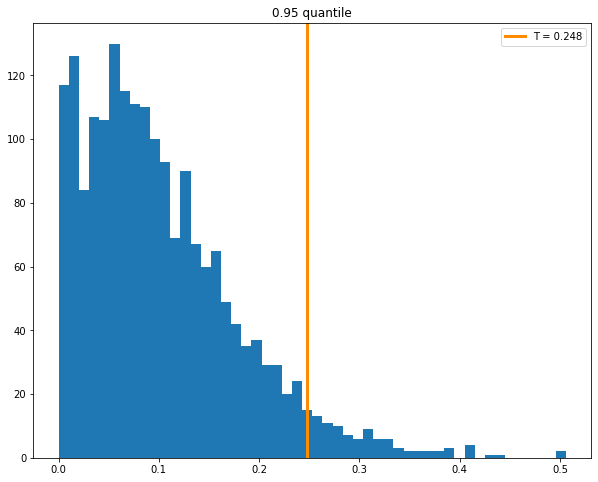

In [71]:
T = compute_T_95(N, Sigma,  sigma_s = sigma_s, x_lim = [0,4], y_lim = [0,4])

In [72]:
df = datagen.GetAllData()
P = datagen.GetPointsCoord()
Sigma = np.asarray(datagen.GetPointsCovMatrix())
density, G = compute_density(P, Sigma, sigma_s)

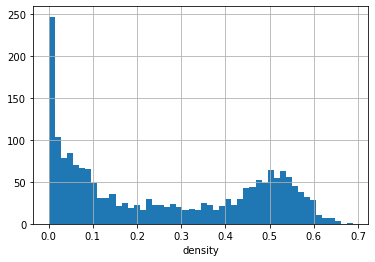

In [73]:
plt.hist(density, bins = 50)
plt.xlabel('density')
plt.grid()
plt.show()

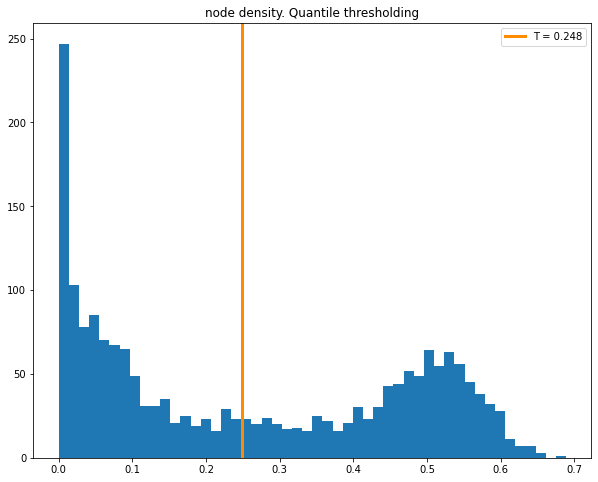

In [74]:
see_histogram(density, T, 'node density. Quantile thresholding')

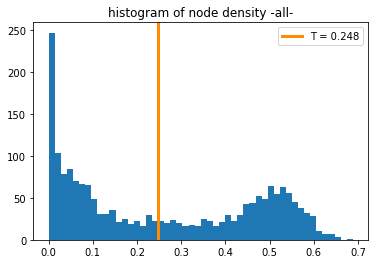

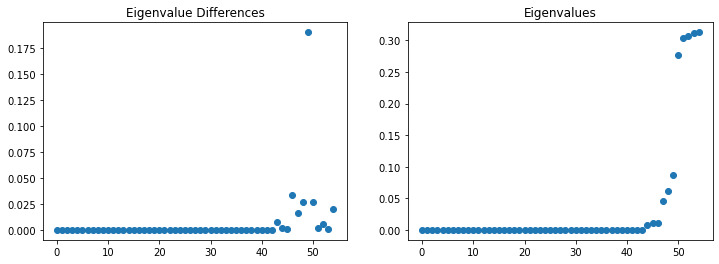

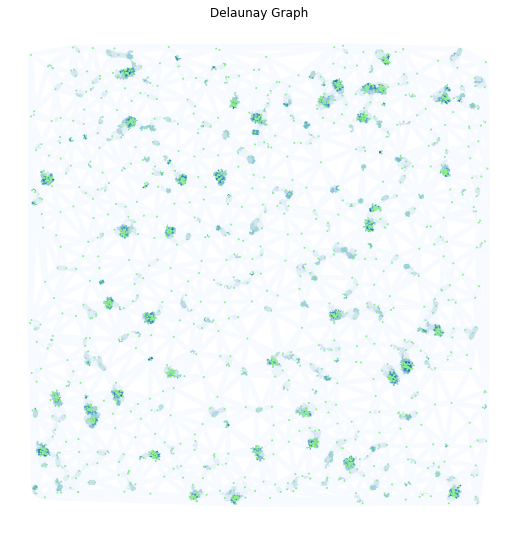

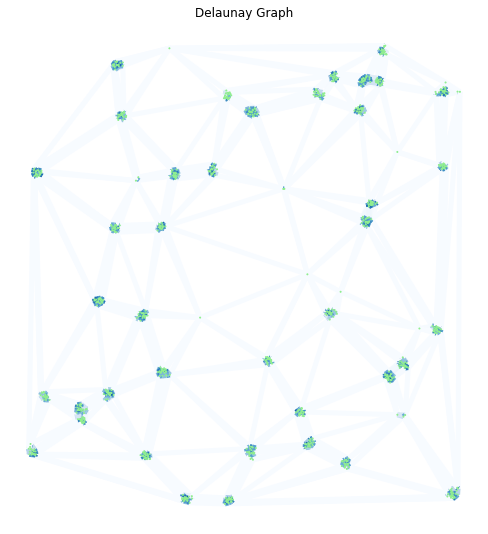

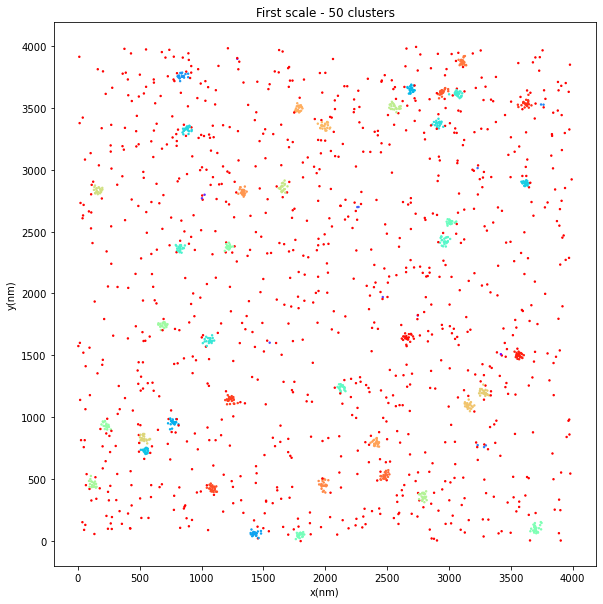

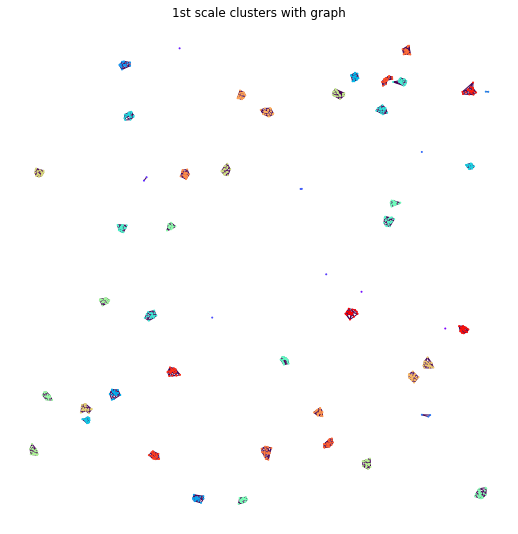

In [75]:
labels = calling_graphic(df, sigma_s, T)
labels_clean = remove_small_clusters(labels, 5)
truelabels = np.asarray(datagen.GetPointsLabels())

In [82]:
FMI  = metrics.fowlkes_mallows_score(truelabels, labels)
NumberOfClusters= len(np.unique(labels))-1

In [83]:
FMI

0.8907667843657237

In [84]:
NumberOfClusters

50

In [100]:
def grid_search(all_sigma_s, cluster_min_size =5):
    
    p = Standard_Param()
    datagen = Call_DataGenerator(p)
    
    N = len(datagen.GetPoints())
    csr = CsrGenerator(N = N, x_lim = [0,4], y_lim = [0,4])
    Sigma = datagen.GetPointsCovMatrix()
    Sigma = np.asarray(Sigma)
    P = datagen.GetPointsCoord()
    truelabels = np.asarray(datagen.GetPointsLabels())
    df = datagen.GetAllData()
    
    
    all_FMI = []
    all_NumberOfClusters = []
    
    for sigma_s in all_sigma_s: 
        T = compute_T_95(N, Sigma,  sigma_s = sigma_s, x_lim = [0,4], y_lim = [0,4])

        density, G = compute_density(P, Sigma, sigma_s)

        labels = calling_graphic(df, sigma_s, T)
        labels_clean = remove_small_clusters(labels, 5)
        FMI  = metrics.fowlkes_mallows_score(truelabels, labels_clean)
        NumberOfClusters= len(np.unique(labels_clean))-1
        all_FMI.append(FMI)
        all_NumberOfClusters.append(NumberOfClusters)
    
    return all_FMI, all_NumberOfClusters
    

In [101]:
all_sigma_s = np.arange(24, 46, 2)

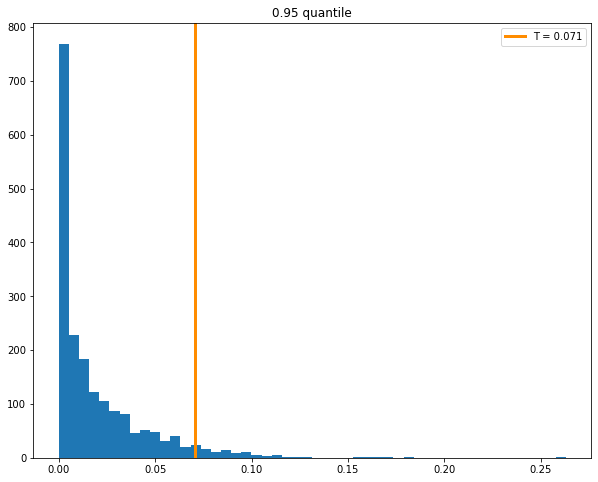

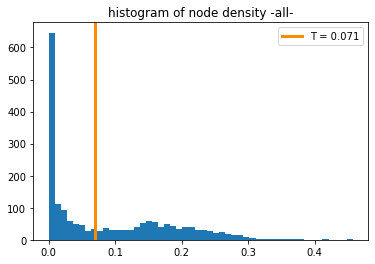

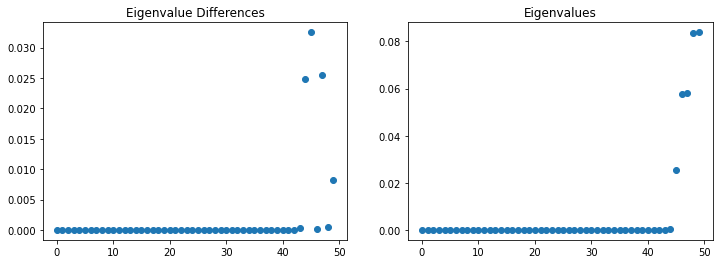

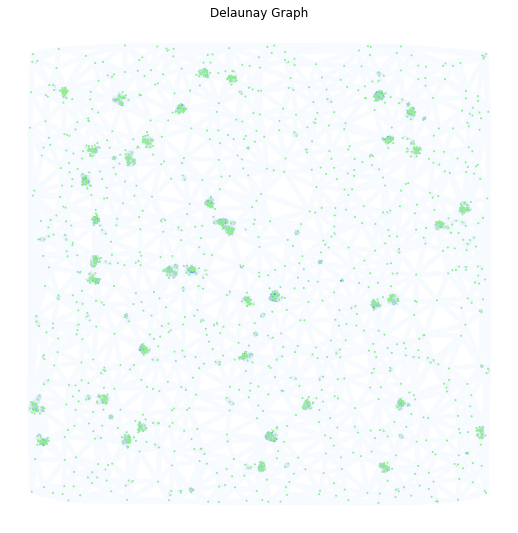

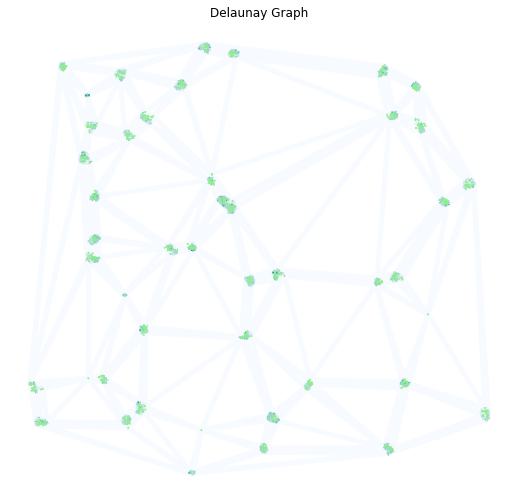

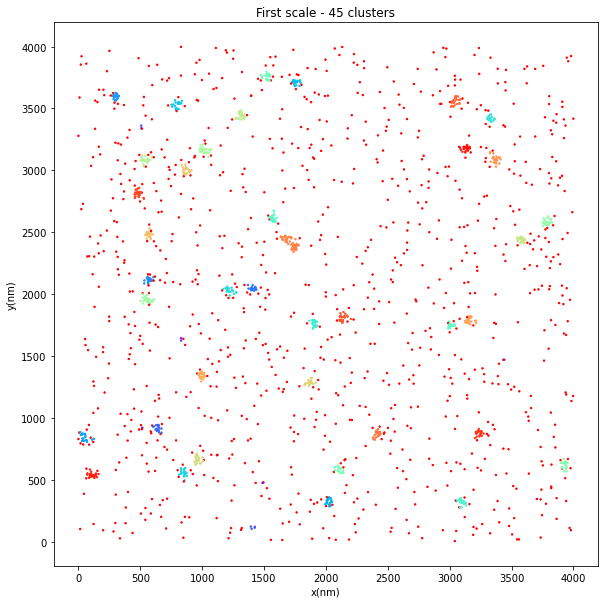

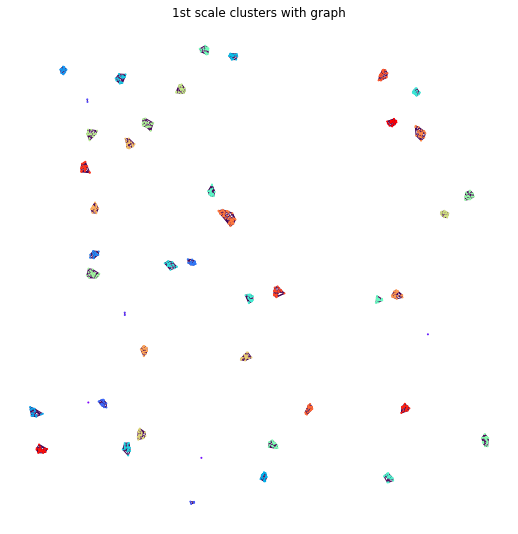

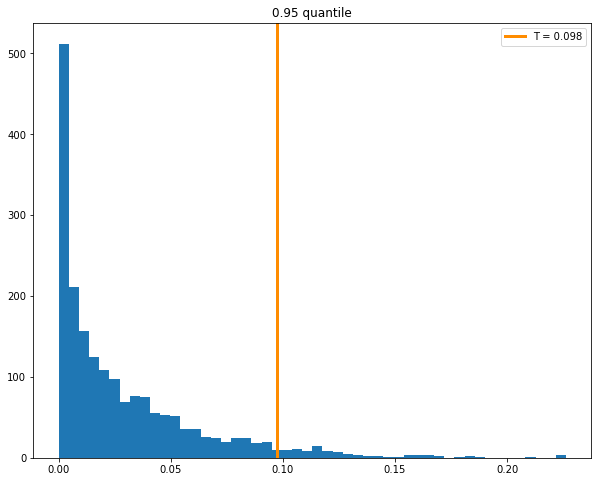

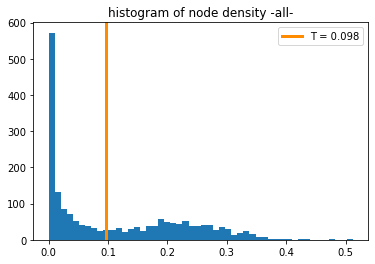

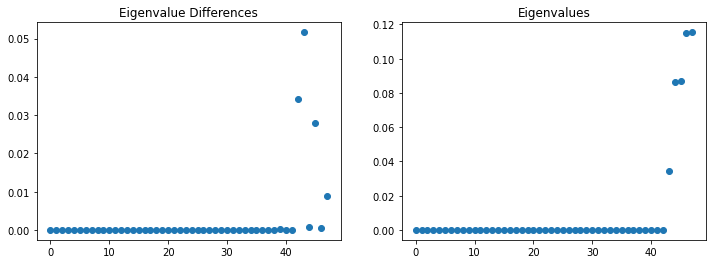

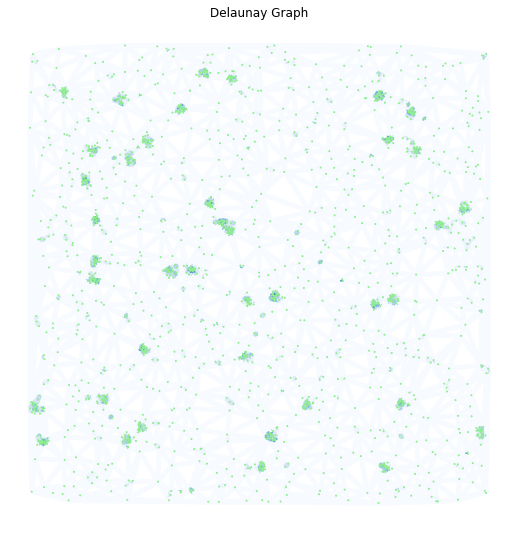

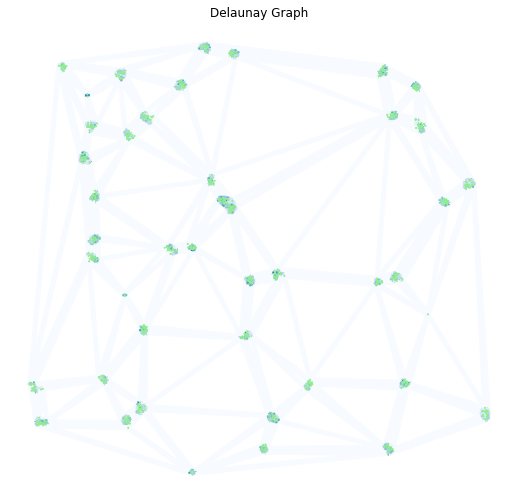

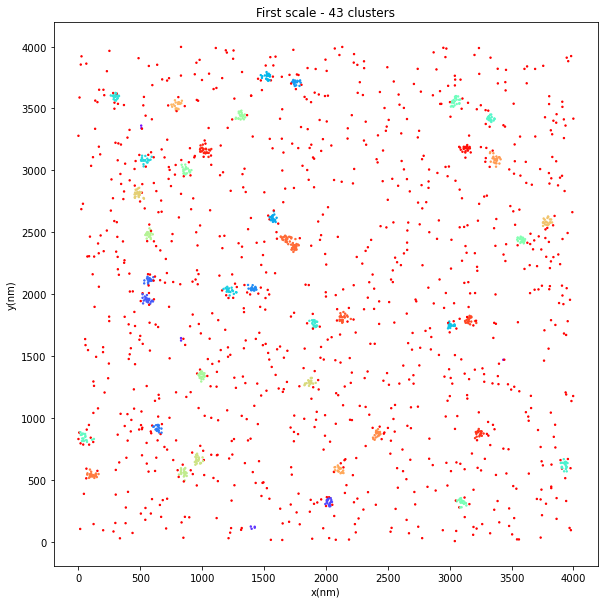

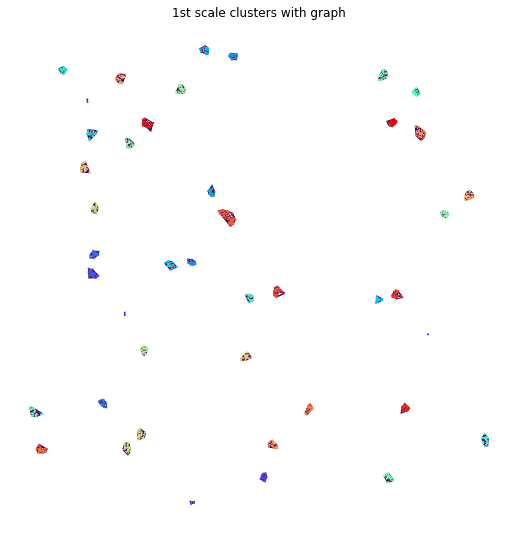

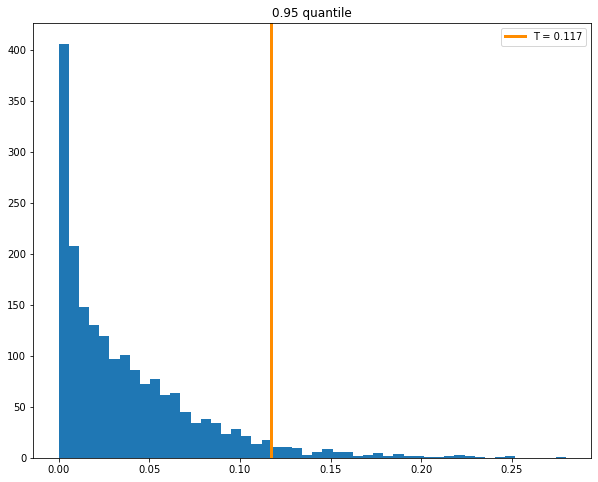

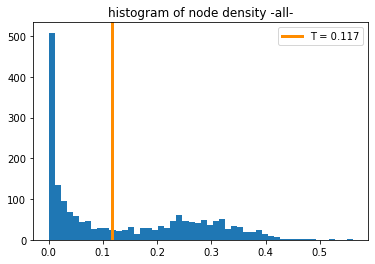

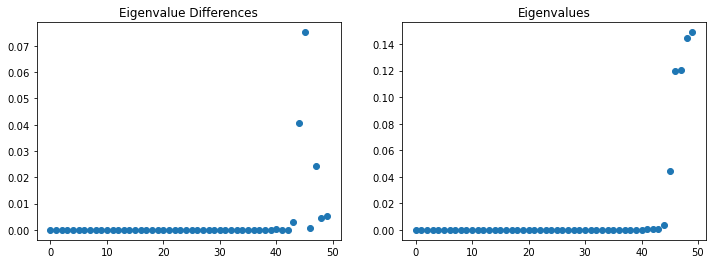

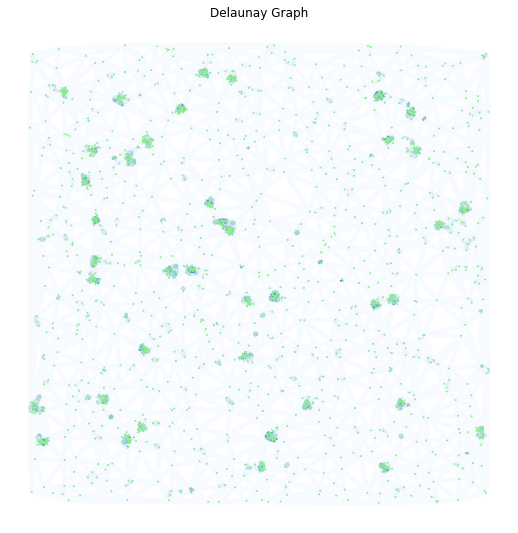

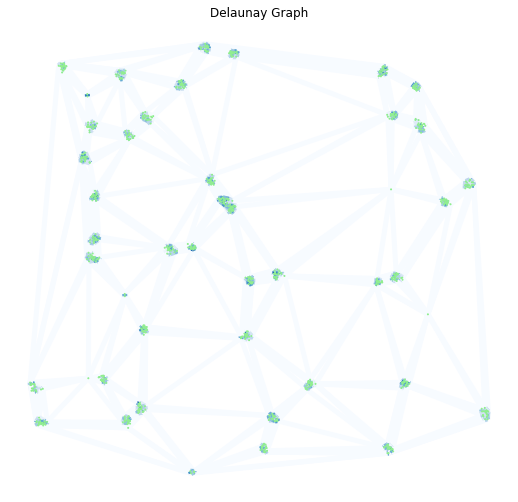

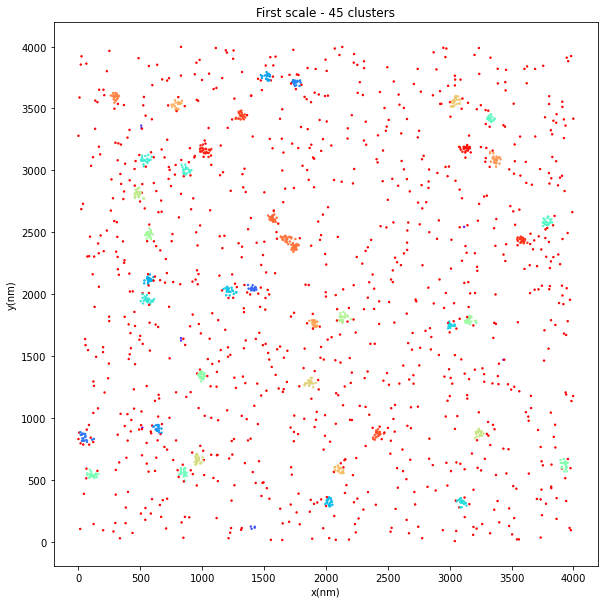

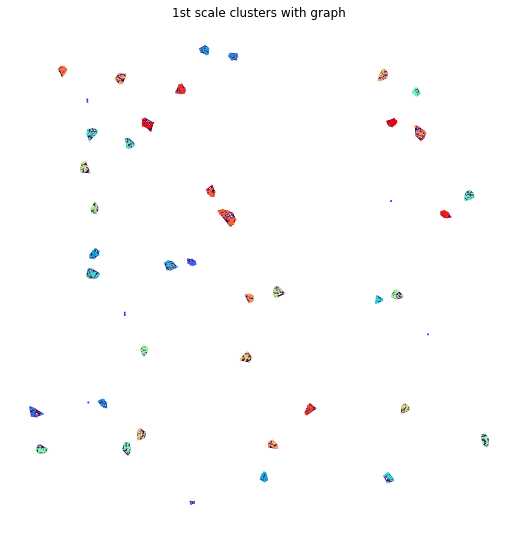

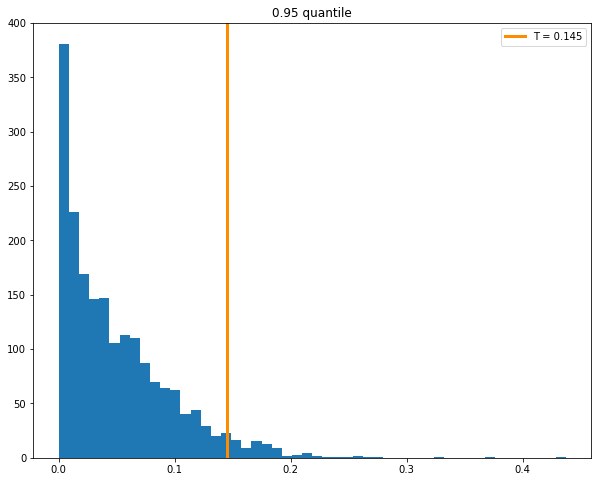

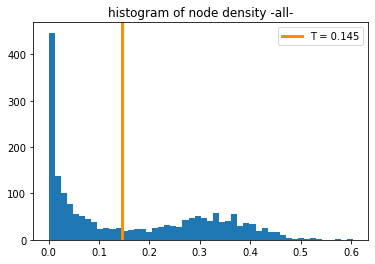

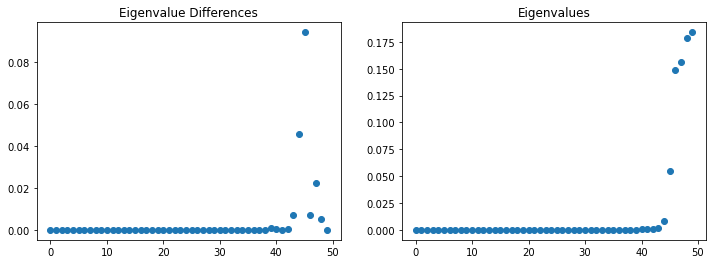

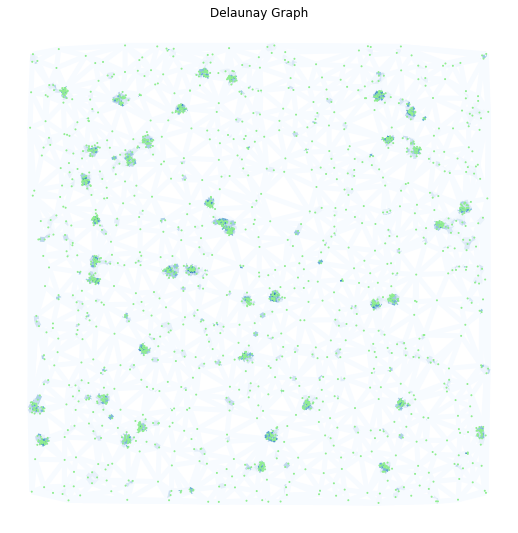

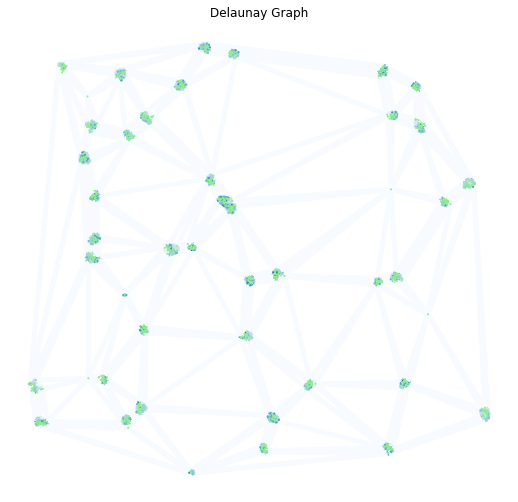

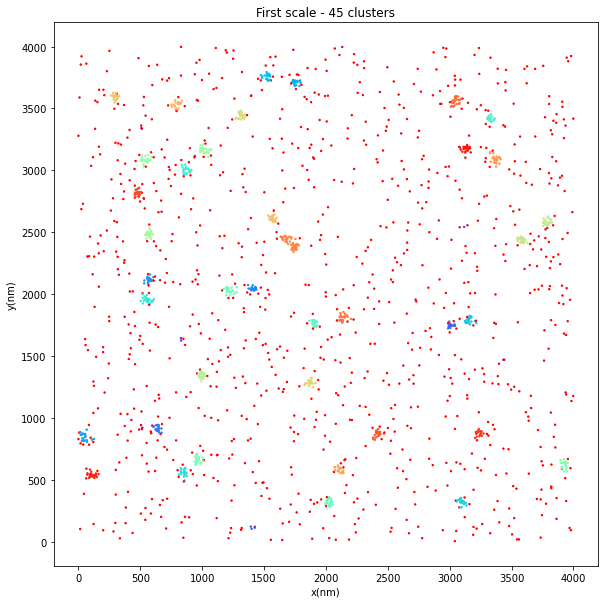

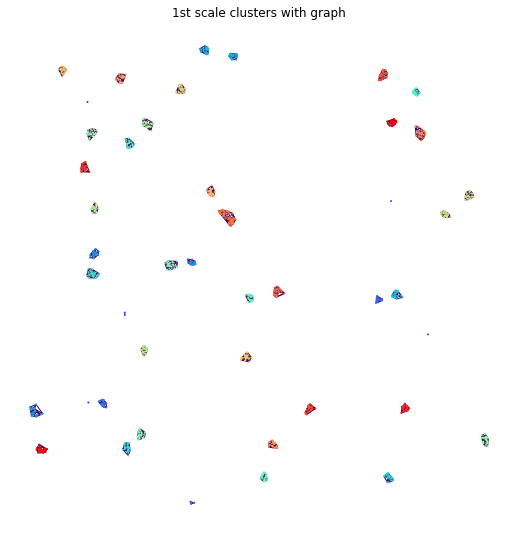

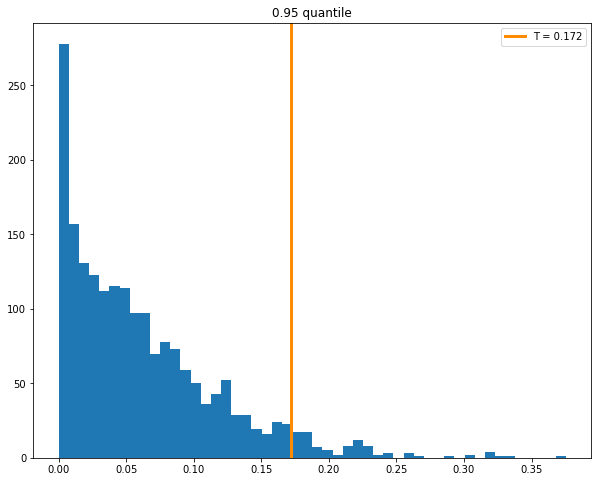

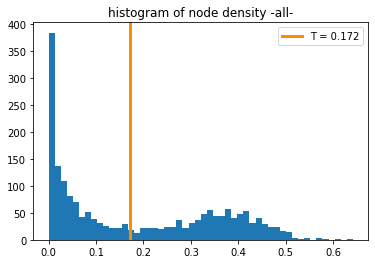

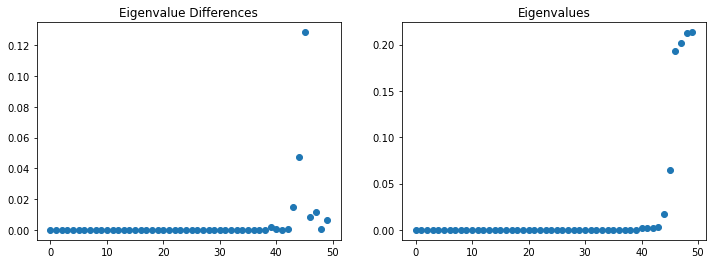

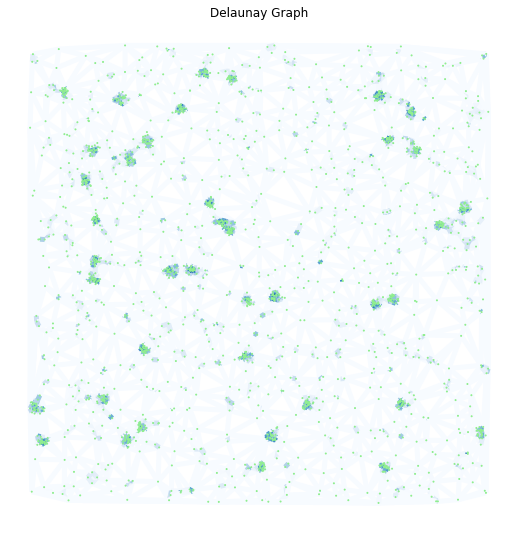

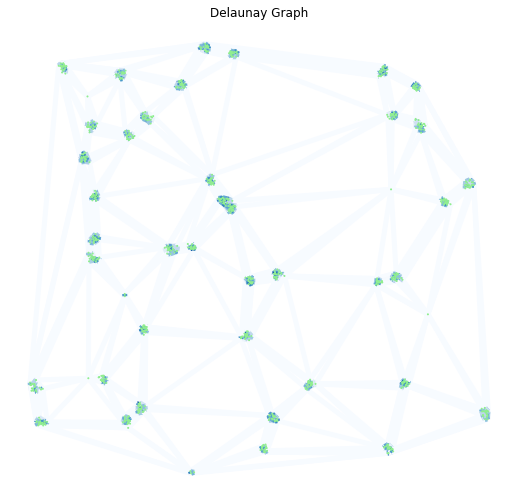

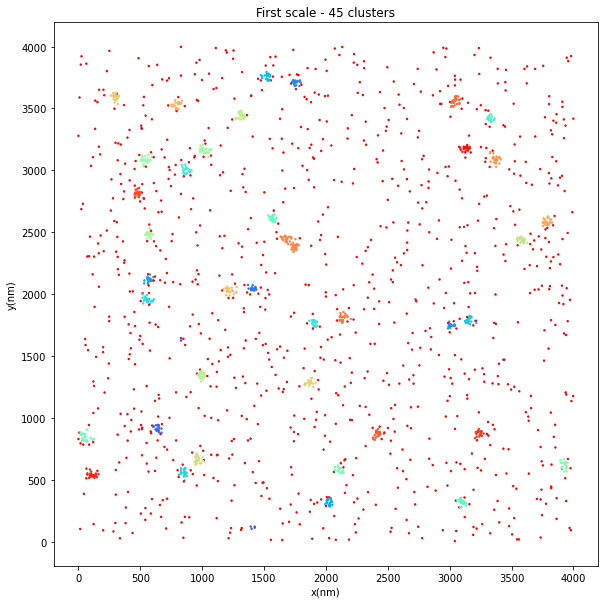

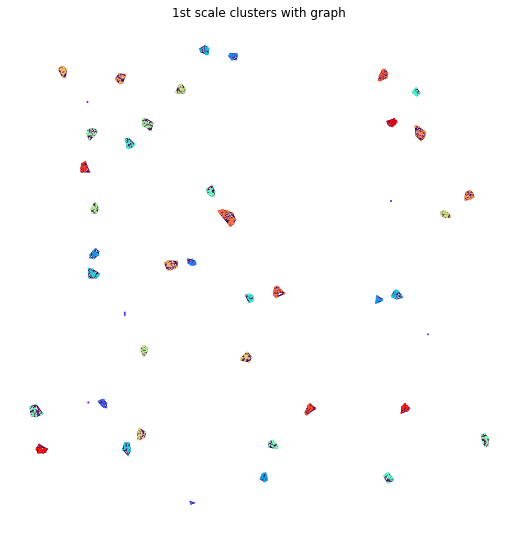

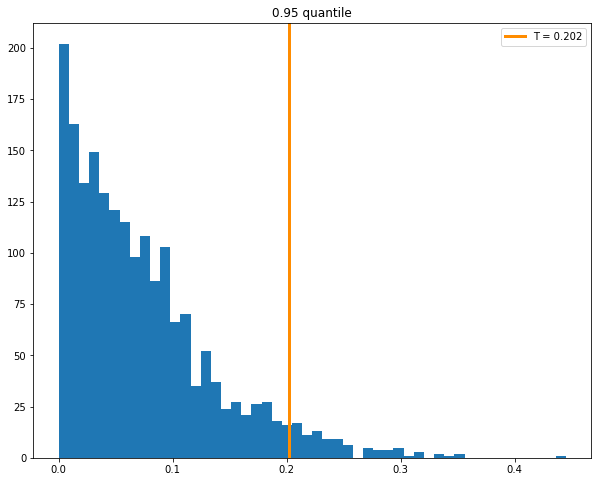

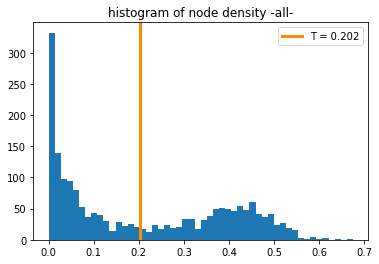

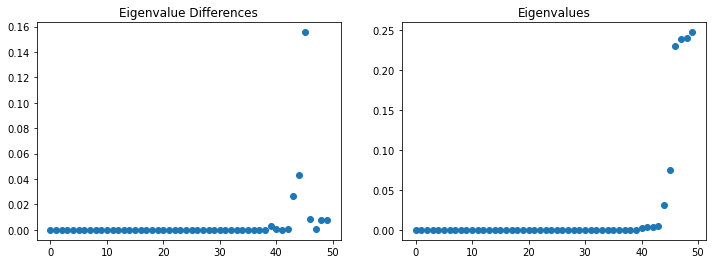

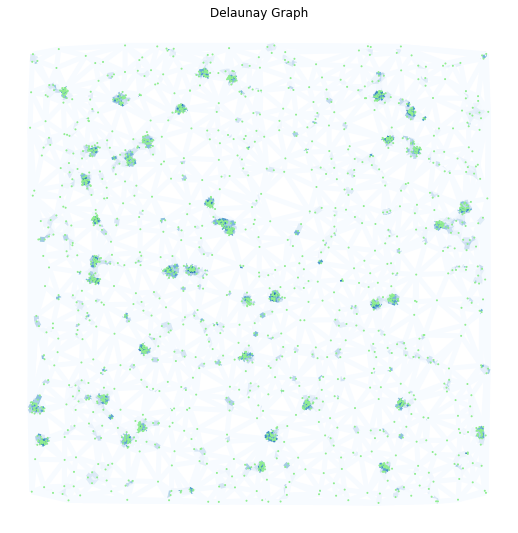

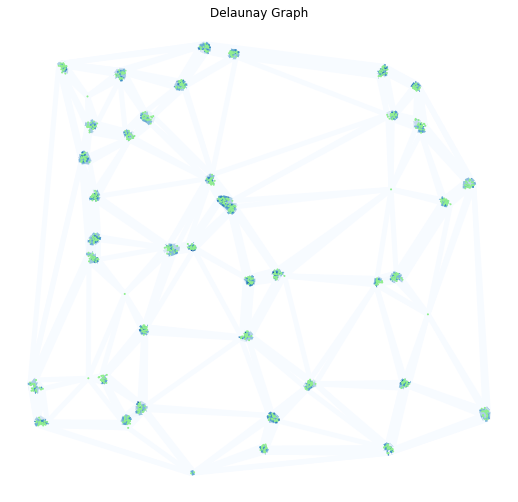

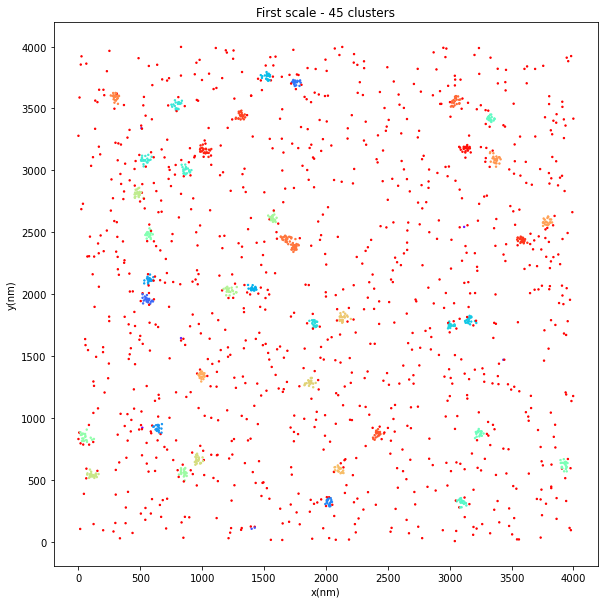

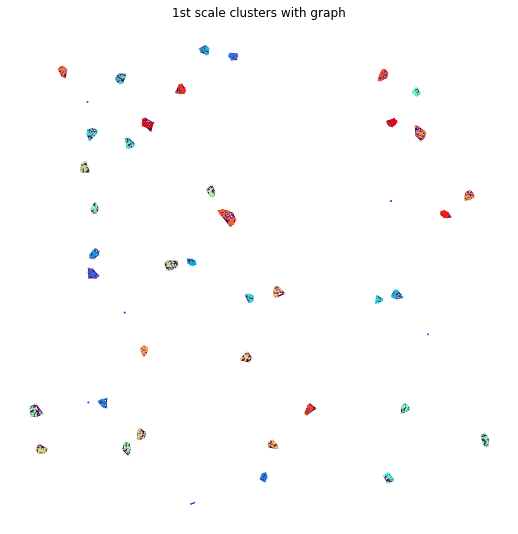

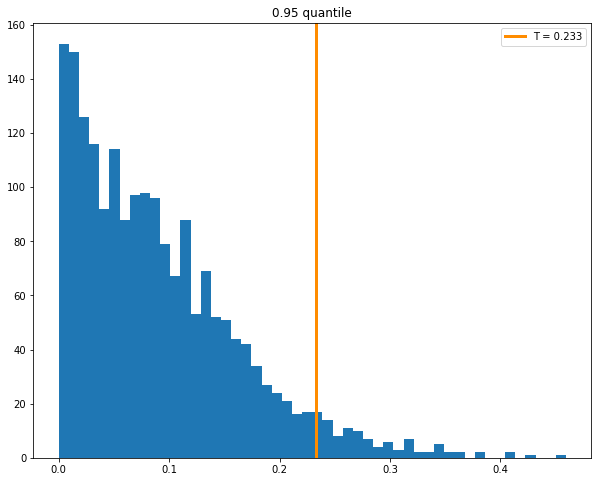

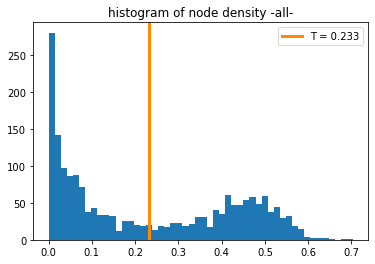

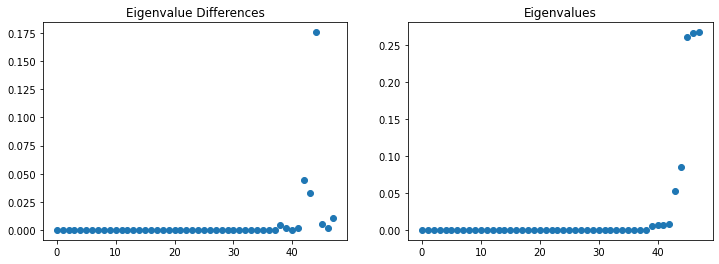

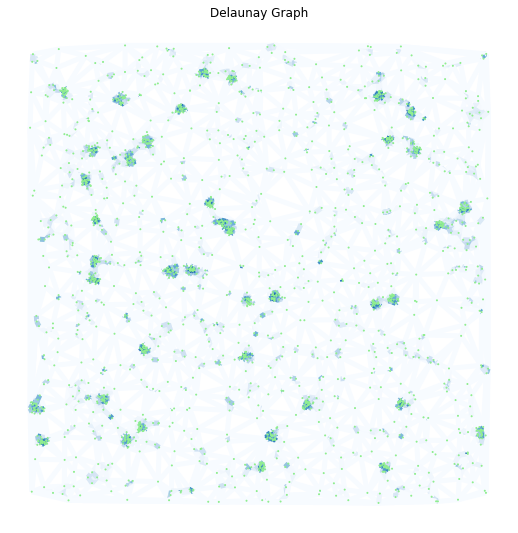

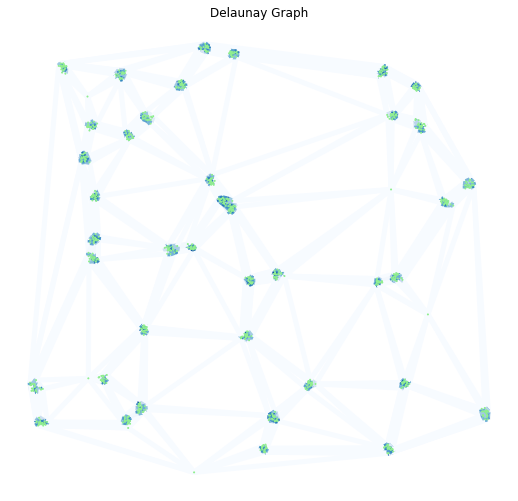

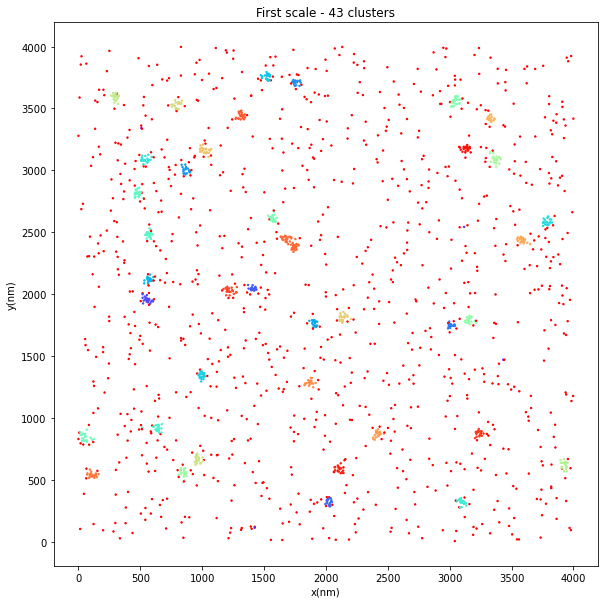

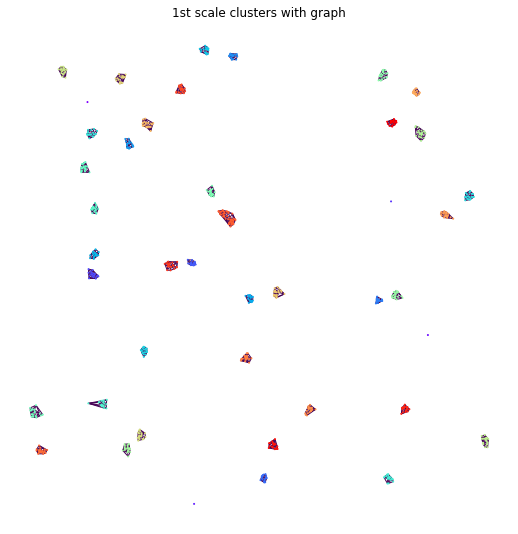

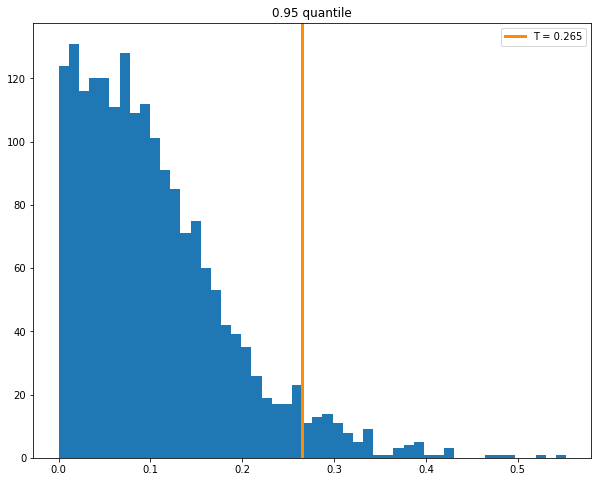

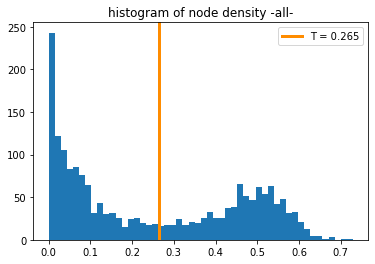

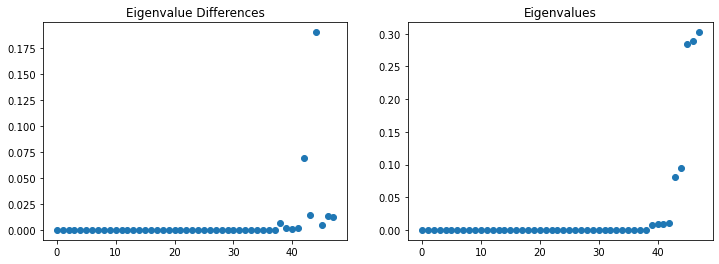

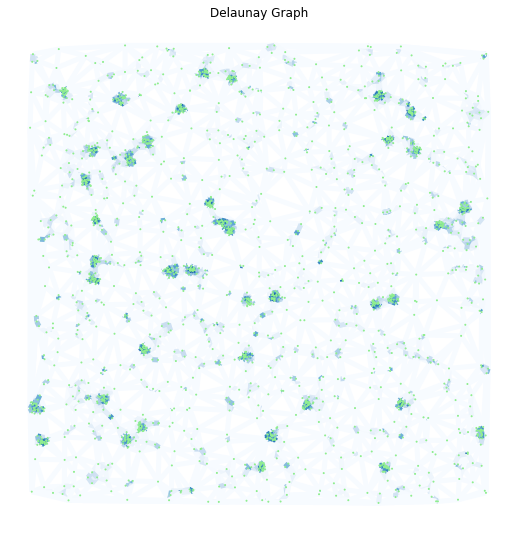

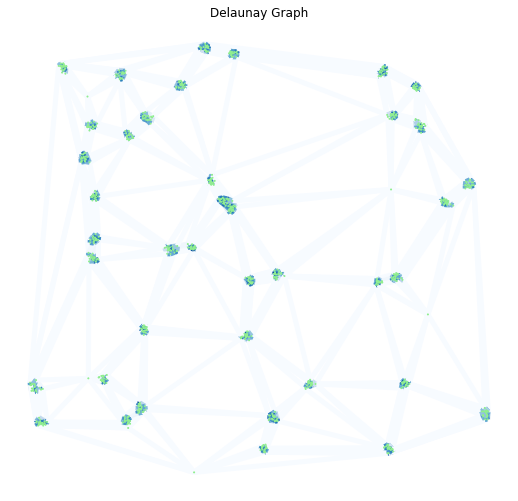

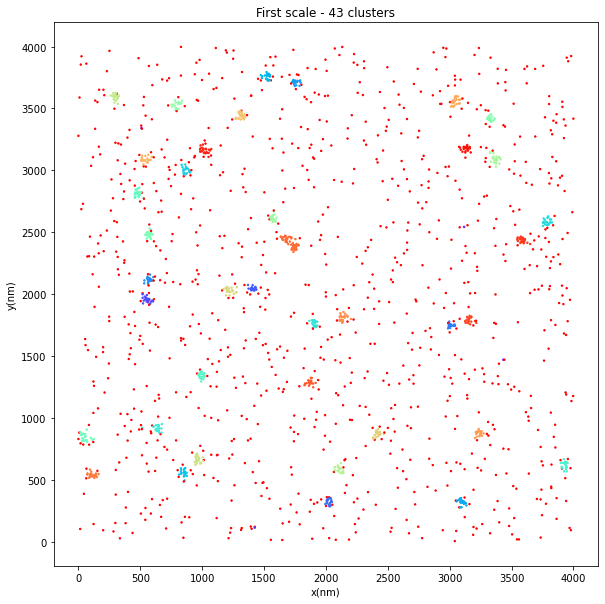

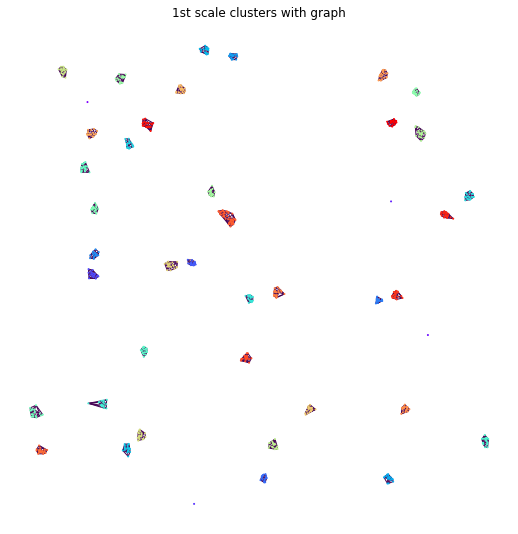

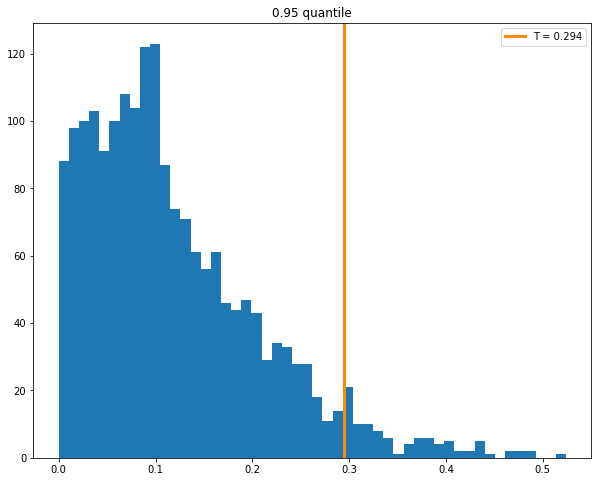

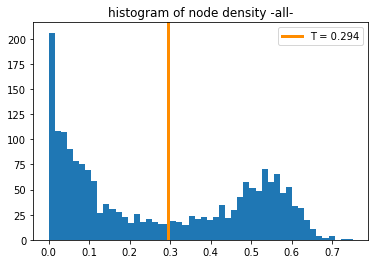

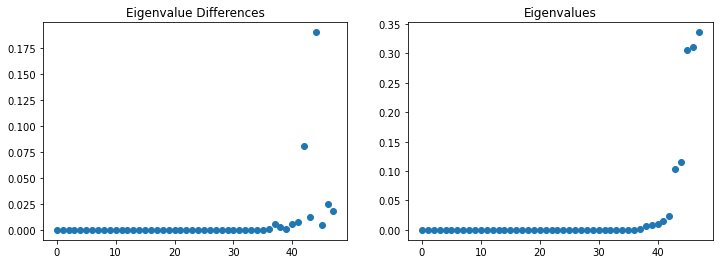

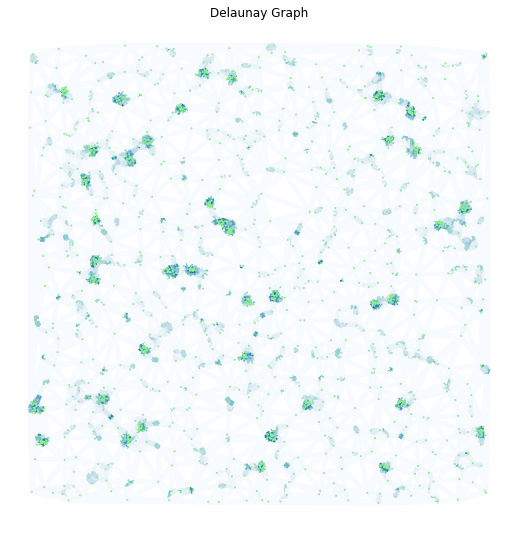

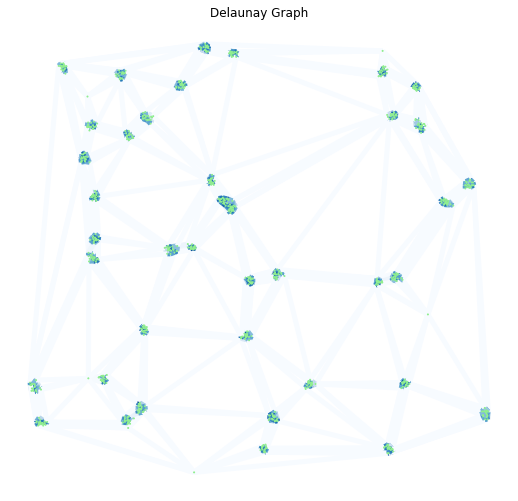

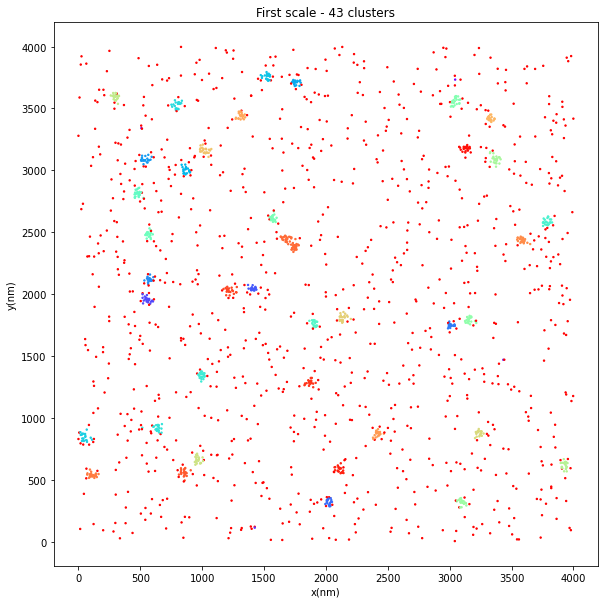

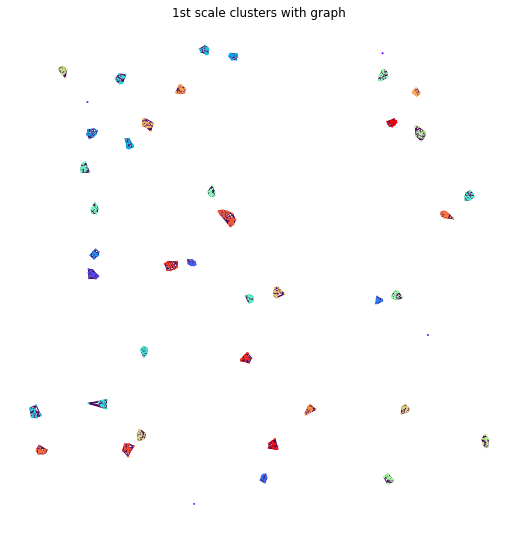

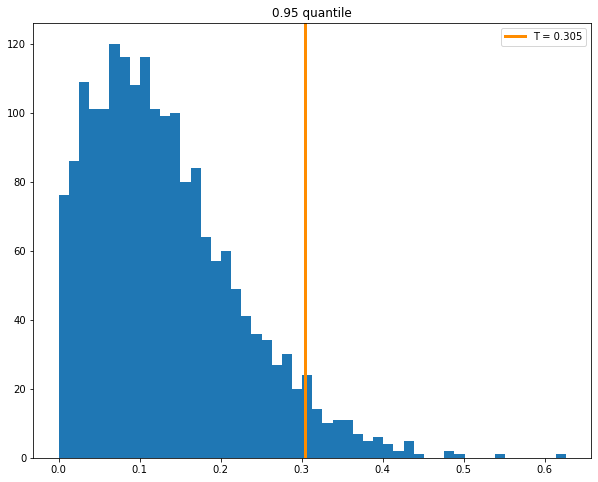

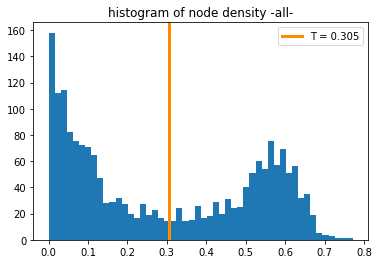

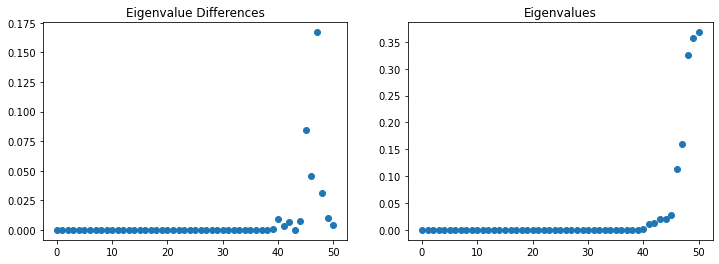

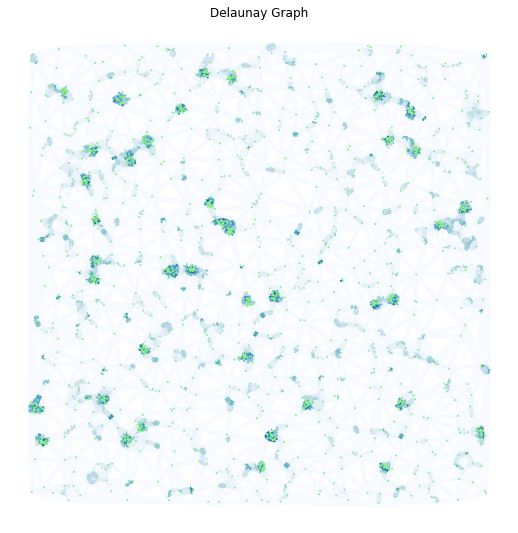

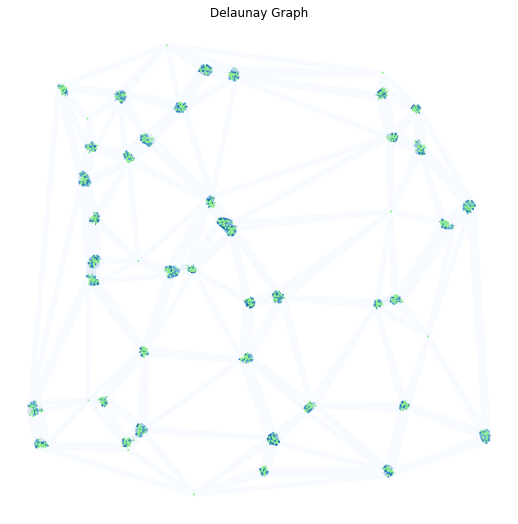

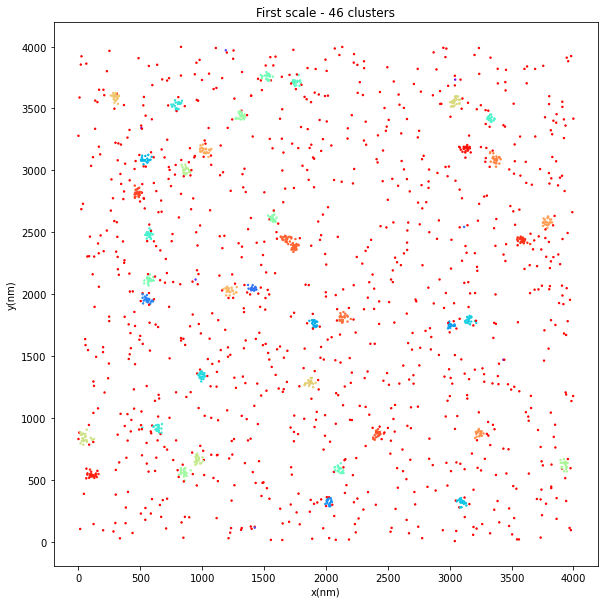

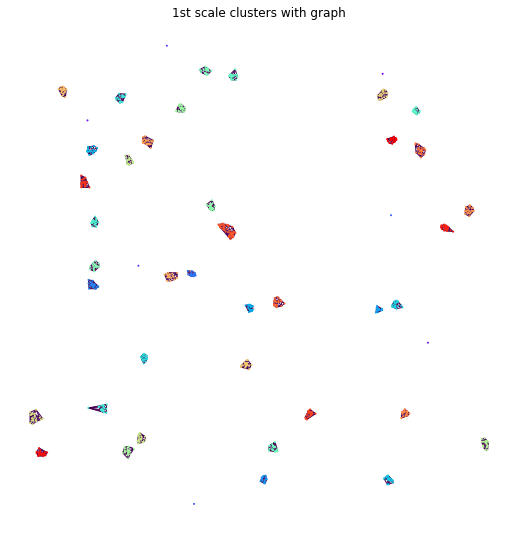

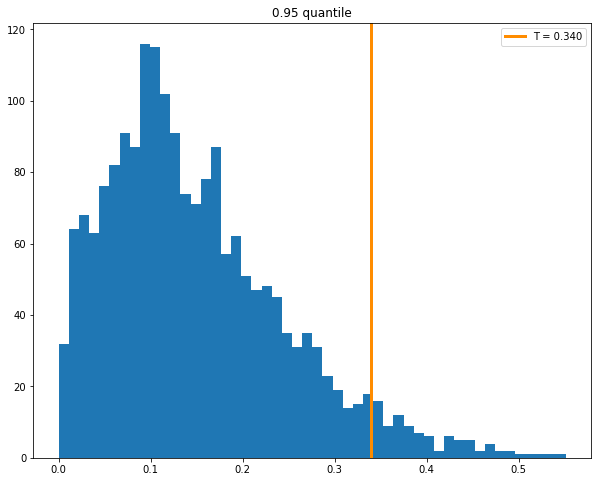

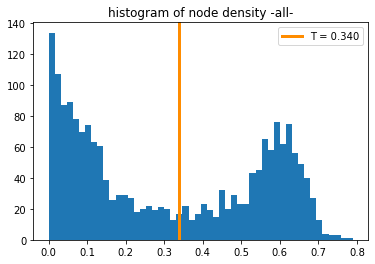

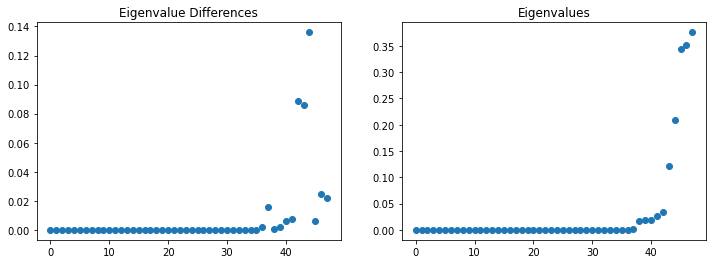

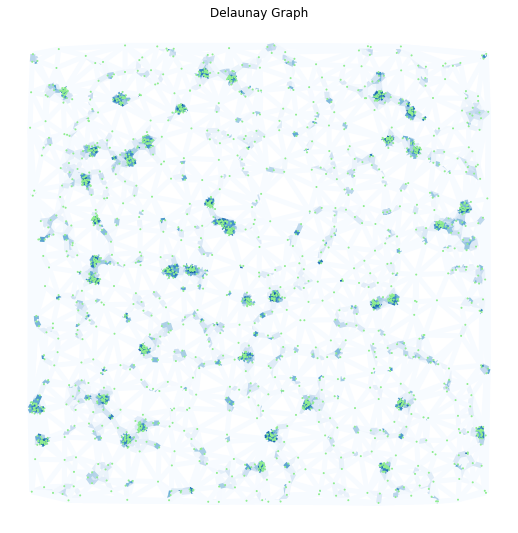

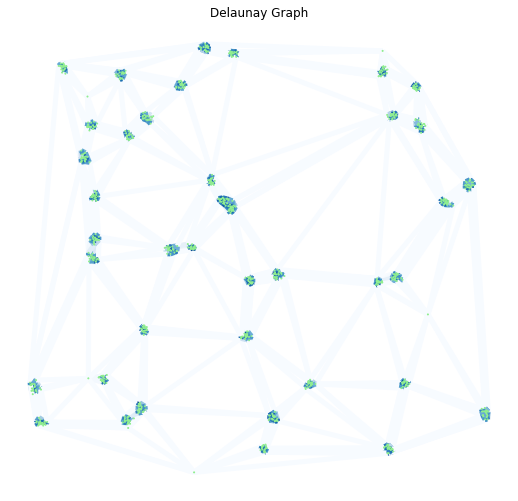

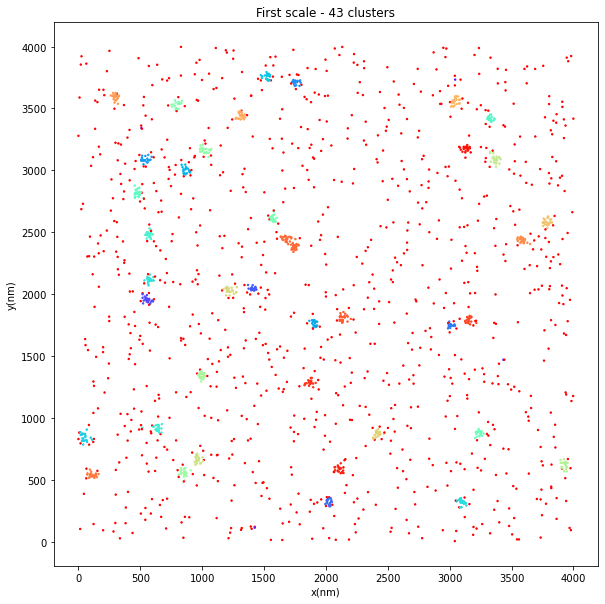

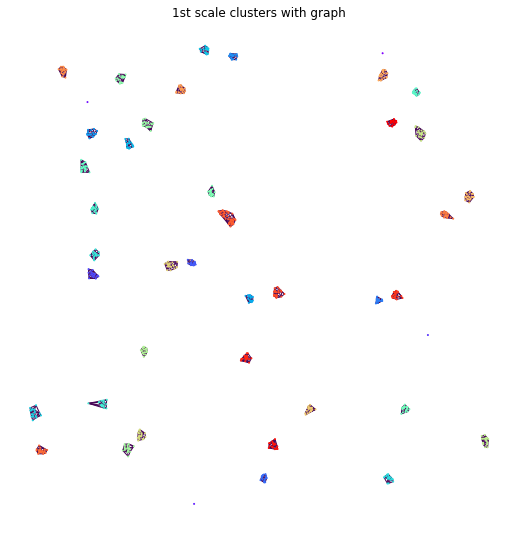

In [102]:
FMIs, Ns = grid_search(all_sigma_s, 5)

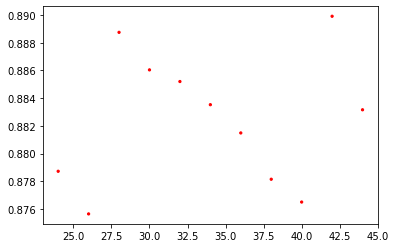

In [103]:
def correct_or_not(n):
    if n == 40: return 1
    if n != 40: return 2
    
colors = [correct_or_not(N) for N in Ns]

plt.scatter(all_sigma_s, FMIs, c = colors, cmap = 'rainbow_r', s = 5)


In [104]:
Ns

[39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39]